In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# !pip3 install pmdarima

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

import pmdarima as pm
from pmdarima.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
data_url = "https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/capstone/stock_market_data.csv"
df = pd.read_csv(data_url)
df["datekey"] = pd.to_datetime(df["datekey"])
df = df.sort_values("datekey")

<IPython.core.display.Javascript object>

In [5]:
ticker = "AAPL"

ticker_data = df[df["ticker"] == ticker]
ticker_data.shape

(21, 31)

<IPython.core.display.Javascript object>

In [6]:
y = ticker_data[["price"]]
y_train, y_test = train_test_split(y)

n_train = len(y_train)
n_test = len(y_test)

train_dates = ticker_data["datekey"][:n_train]
test_dates = ticker_data["datekey"][n_train:]

<IPython.core.display.Javascript object>

In [7]:
model = pm.auto_arima(y_train, m=4, suppress_warnings=True, trace=True)
forecast = model.predict(n_test)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=119.099, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=122.629, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=122.741, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=120.179, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=120.852, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=120.869, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=120.849, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=120.932, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=122.492, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4] intercept
Total fit time: 0.638 seconds


<IPython.core.display.Javascript object>

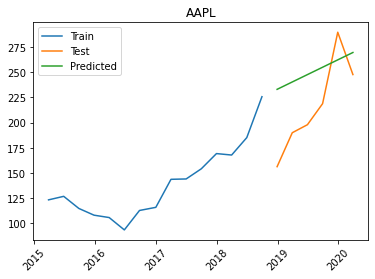

<IPython.core.display.Javascript object>

In [8]:
plt.plot(train_dates, y_train, label="Train")
plt.plot(test_dates, y_test, label="Test")
plt.plot(test_dates, forecast, label="Predicted")
plt.xticks(rotation=45)
plt.title(ticker)
plt.legend()
plt.show()